In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import logging

logging.basicConfig(level=logging.INFO)

In [7]:
class KMeansBishop:
    def __init__(self, num_clusters, max_iter=3000):
        self.K = num_clusters  # Number of clusters
        self.max_iter = max_iter  # Maximum iterations
        self.mu = None  # Centroids
        self.assignment = None  # Assignments
        self.data = None  # Data points
        self.N = None

    def init_centroids_randomly(self):
        self.mu = self.data[np.random.choice(self.N, self.K, replace=False)]  # Randomly initialize centroids

    def fit(self, data):
        self.data = data  # Store data
        self.N = len(data)  # Number of data points
        self.init_centroids_randomly()  # Initialize centroids
        logging.info("Successfully initialized centroids.")
        
        # Initialize the assignment matrix (cluster indices)
        self.assignment = np.zeros(self.N, dtype=int)
        
        for iteration in range(self.max_iter):  # Maximum iteration limit
            new_assignment = np.zeros_like(self.assignment)  # Temporary assignment matrix
            
            # Assign each point to the nearest centroid
            for i in range(self.N):
                distances = np.linalg.norm(self.data[i] - self.mu, axis=1)  # Calculate distances to centroids
                closest_cluster = np.argmin(distances)  # Index of the nearest centroid
                new_assignment[i] = closest_cluster  # Assign to the closest centroid
            
            # Recalculate centroids based on current assignment
            for k in range(self.K):
                cluster_data = self.data[new_assignment == k]  # Data points in the current cluster
                if len(cluster_data) > 0:
                    self.mu[k] = np.mean(cluster_data, axis=0)  # Update the centroid
            
            # Check for convergence
            if np.all(self.assignment == new_assignment):
                break  # If assignments haven't changed, break
            
            self.assignment = new_assignment.copy()  # Update assignments
        
        return self.mu, self.assignment



In [10]:
def get_color_list(num_colors, cmap_name='tab20'):
    # Create a color map from the given name
    cmap = plt.get_cmap(cmap_name)
    # Generate a list of colors by evenly spacing across the colormap
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    return colors


INFO:root:Successfully initialized centroids.
C:\Users\MyunginKim\AppData\Local\Temp\ipykernel_26932\3488269284.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')


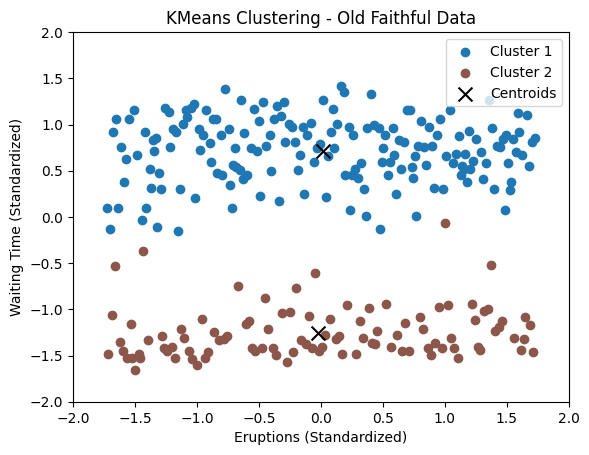

In [17]:
# Load data from CSV
df = pd.read_csv("./dataset/faithful.csv")

# Standardize data with StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)  # Apply standardization

# Instantiate KMeansBishop with 2 clusters
NUM_CLUSTERS = 2
kmeans = KMeansBishop(num_clusters=NUM_CLUSTERS)
centroids, assignments = kmeans.fit(data_scaled)  # Fit the model

# Scatter plot with color-coded clusters and centroids marked with 'x'
# colors = ["red", "green", "blue"]  # Colors for different clusters

colors = get_color_list(NUM_CLUSTERS)
plt.xlim([-2, 2])  # Set x-axis limit
plt.ylim([-2, 2])  # Set y-axis limit
# Plot the clusters
for i in range(num_clusters):
    cluster_points = data_scaled[assignments == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker='x', s=100, label='Centroids')

# Add labels, title, and legend
plt.xlabel("Eruptions (Standardized)")
plt.ylabel("Waiting Time (Standardized)")
plt.title("KMeans Clustering - Old Faithful Data")
plt.legend()
plt.show()